In [1]:
from ReadStats import Statistics, Pdfs 
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
from matplotlib import rc


rc('text', usetex=True)
rc('text.latex', preamble=r"\usepackage{fourier}")
rc('font', family='serif')
rc('font', size=24)
rc('axes', linewidth=1.5)
rc('axes', labelsize=24)

opath = '/Volumes/Seagate/SCRATCH/plots/3D/Re025/Rapids/'

path = '/Volumes/Seagate/SCRATCH/qCBL_3D/Re025/'

In [2]:
# Constants

nu = 1./15000.
B0 = 0.005
N = np.sqrt(3)
L0 = (B0/N**3)**0.5
ceps = 0.1

##########################################################################
# Stats
# Data is at z_enc/L_0 = 19, 20, and 21.

S0 = Statistics(path+'2496x512x2496-S00/stats/pdftimes/avg16000-21000.nc')
S05 = Statistics(path+'1280x512x1280-S05/stats/pdftimes/avg22000-28000.nc')
S10 = Statistics(path+'1280x512x1280-S10/stats/pdftimes/avg24000-32000.nc')
S15 = Statistics(path+'1536x576x1536-S15/stats/pdftimes/avg27000-35000.nc')
S20 = Statistics(path+'S20-1536x576x1536/stats/pdftimes/avg28000-35000.nc')
S25 = Statistics(path+'2560x896x2560-S25/stats/pdftimes/avg46000-57000.nc')

In [16]:
# Pdfs
# Data is at z_enc/L_0 = 19, 20, and 21.

S0_vortpdf = Pdfs([path+'2496x512x2496-S00/stats/pdfs/pdf16000.LnEnstrophyW_iW_i',
                   path+'2496x512x2496-S00/stats/pdfs/pdf18000.LnEnstrophyW_iW_i',
                   path+'2496x512x2496-S00/stats/pdfs/pdf21000.LnEnstrophyW_iW_i'],
                  path+'2496x512x2496-S00/y.dat')
S05_vortpdf = Pdfs([path+'1280x512x1280-S05/stats/pdfs/pdf22000.LnEnstrophyW_iW_i',
                    path+'1280x512x1280-S05/stats/pdfs/pdf25000.LnEnstrophyW_iW_i',
                    path+'1280x512x1280-S05/stats/pdfs/pdf28000.LnEnstrophyW_iW_i'],
                   path+'1280x512x1280-S05/y.dat')
S10_vortpdf =  Pdfs([path+'1280x512x1280-S10/stats/pdfs/pdf24000.LnEnstrophyW_iW_i',
                     path+'1280x512x1280-S10/stats/pdfs/pdf28000.LnEnstrophyW_iW_i',
                     path+'1280x512x1280-S10/stats/pdfs/pdf32000.LnEnstrophyW_iW_i'],
                    path+'1280x512x1280-S10/y.dat')
S15_vortpdf = Pdfs([path+'1536x576x1536-S15/stats/pdfs/pdf27000.LnEnstrophyW_iW_i',
                    path+'1536x576x1536-S15/stats/pdfs/pdf31000.LnEnstrophyW_iW_i',
                    path+'1536x576x1536-S15/stats/pdfs/pdf35000.LnEnstrophyW_iW_i'],
                   path+'1536x576x1536-S15/y.dat')
S20_vortpdf = Pdfs([path+'S20-1536x576x1536/stats/pdfs/pdf28000.LnEnstrophyW_iW_i',
                    path+'S20-1536x576x1536/stats/pdfs/pdf31000.LnEnstrophyW_iW_i',
                    path+'S20-1536x576x1536/stats/pdfs/pdf35000.LnEnstrophyW_iW_i'],
                   path+'S20-1536x576x1536/y.dat')
S25_vortpdf = Pdfs([path+'2560x896x2560-S25/stats/pdfs/pdf46000.LnEnstrophyW_iW_i',
                    path+'2560x896x2560-S25/stats/pdfs/pdf51000.LnEnstrophyW_iW_i',
                    path+'2560x896x2560-S25/stats/pdfs/pdf57000.LnEnstrophyW_iW_i'],
                   path+'2560x896x2560-S25/y.dat')

# Create grid on which to interpolate pdfs
# Doesn't really matter which one is used, as long as it's the same in pdfs_saddle_point.ipynb

S0_vortpdf_interp_data = Pdfs([path+'2496x512x2496-S00/stats/pdfs/pdf48000.LnEnstrophyW_iW_i'],path+'2496x512x2496-S00/y.dat')
S05_vortpdf_interp_data = Pdfs([path+'1280x512x1280-S05/stats/pdfs/pdf57000.LnEnstrophyW_iW_i'],path+'1280x512x1280-S05/y.dat')
S10_vortpdf_interp_data = Pdfs([path+'1280x512x1280-S10/stats/pdfs/pdf84000.LnEnstrophyW_iW_i'],path+'1280x512x1280-S10/y.dat')
S15_vortpdf_interp_data = Pdfs([path+'1536x576x1536-S15/stats/pdfs/pdf76000.LnEnstrophyW_iW_i'],path+'1536x576x1536-S15/y.dat')
S20_vortpdf_interp_data = Pdfs([path+'S20-1536x576x2304/stats/pdfs/pdf75000.LnEnstrophyW_iW_i'],path+'S20-1536x576x1536/y.dat')
S25_vortpdf_interp_data = Pdfs([path+'2560x896x2560-S25/stats/pdfs/pdf110000.LnEnstrophyW_iW_i'],path+'2560x896x2560-S25/y.dat')

# Interpolate pdfs in x-direction

S0_vortpdf_interp = np.zeros((3,S0.y_len,S0_vortpdf.nb))
for n in range(3):
    for j in range(S0.y_len):
        S0_vortpdf_interp[n,j,:] = np.interp(S0_vortpdf_interp_data.xy[0,0,j,:],S0_vortpdf.xy[0,n,j,:],S0_vortpdf.pdf[n,j,:-2])

S05_vortpdf_interp = np.zeros((3,S05.y_len,S05_vortpdf.nb))
for n in range(3):
    for j in range(S05.y_len):
        S05_vortpdf_interp[n,j,:] = np.interp(S05_vortpdf_interp_data.xy[0,0,j,:],S05_vortpdf.xy[0,n,j,:],S05_vortpdf.pdf[n,j,:-2])

S10_vortpdf_interp = np.zeros((3,S10.y_len,S10_vortpdf.nb))
for n in range(3):
    for j in range(S10.y_len):
        S10_vortpdf_interp[n,j,:] = np.interp(S10_vortpdf_interp_data.xy[0,0,j,:],S10_vortpdf.xy[0,n,j,:],S10_vortpdf.pdf[n,j,:-2])

S15_vortpdf_interp = np.zeros((3,S15.y_len,S15_vortpdf.nb))
for n in range(3):
    for j in range(S15.y_len):
        S15_vortpdf_interp[n,j,:] = np.interp(S15_vortpdf_interp_data.xy[0,0,j,:],S15_vortpdf.xy[0,n,j,:],S15_vortpdf.pdf[n,j,:-2])

S20_vortpdf_interp = np.zeros((3,S20.y_len,S20_vortpdf.nb))
for n in range(3):
    for j in range(S20.y_len):
        S20_vortpdf_interp[n,j,:] = np.interp(S20_vortpdf_interp_data.xy[0,0,j,:],S20_vortpdf.xy[0,n,j,:],S20_vortpdf.pdf[n,j,:-2])

S25_vortpdf_interp = np.zeros((3,S25.y_len,S25_vortpdf.nb))
for n in range(3):
    for j in range(S25.y_len):
        S25_vortpdf_interp[n,j,:] = np.interp(S25_vortpdf_interp_data.xy[0,0,j,:],S25_vortpdf.xy[0,n,j,:],S25_vortpdf.pdf[n,j,:-2])
        
# Mean of pdfs

S0_vortpdf_interp_runmean = np.mean(S0_vortpdf_interp,axis=0)
S05_vortpdf_interp_runmean = np.mean(S05_vortpdf_interp,axis=0)
S10_vortpdf_interp_runmean = np.mean(S10_vortpdf_interp,axis=0)
S15_vortpdf_interp_runmean = np.mean(S15_vortpdf_interp,axis=0)
S20_vortpdf_interp_runmean = np.mean(S20_vortpdf_interp,axis=0)
S25_vortpdf_interp_runmean = np.mean(S25_vortpdf_interp,axis=0)

# Find mean of pdf at each height
    
meanvort_S0 = np.zeros(S0.y_len)
meanprob_vort_S0 = np.zeros(S0.y_len)
for i in range(0,S0.y_len):
    meanvort_S0[i] = np.average(S0_vortpdf_interp_data.xy[0,0,i,:],weights=S0_vortpdf_interp_runmean[i,:])
    meanprob_vort_S0[i] = S0_vortpdf_interp_runmean[i,np.argmin(np.abs(S0_vortpdf_interp_data.xy[0,0,i,:]-meanvort_S0[i]))]
meanvort_S0 = np.log10(np.exp(meanvort_S0)/(ceps*B0/nu))

meanvort_S05 = np.zeros(S05.y_len)
meanprob_vort_S05 = np.zeros(S05.y_len)
for i in range(0,S05.y_len):
    meanvort_S05[i] = np.average(S05_vortpdf_interp_data.xy[0,0,i,:],weights=S05_vortpdf_interp_runmean[i,:])
    meanprob_vort_S05[i] = S05_vortpdf_interp_runmean[i,np.argmin(np.abs(S05_vortpdf_interp_data.xy[0,0,i,:]-meanvort_S05[i]))]
meanvort_S05 = np.log10(np.exp(meanvort_S05)/(ceps*B0/nu))

meanvort_S10 = np.zeros(S10.y_len)
meanprob_vort_S10 = np.zeros(S10.y_len)
for i in range(0,S10.y_len):
    meanvort_S10[i] = np.average(S10_vortpdf_interp_data.xy[0,0,i,:],weights=S10_vortpdf_interp_runmean[i,:])
    meanprob_vort_S10[i] = S10_vortpdf_interp_runmean[i,np.argmin(np.abs(S10_vortpdf_interp_data.xy[0,0,i,:]-meanvort_S10[i]))]
meanvort_S10 = np.log10(np.exp(meanvort_S10)/(ceps*B0/nu))

meanvort_S15 = np.zeros(S15.y_len)
meanprob_vort_S15 = np.zeros(S15.y_len)
for i in range(0,S15.y_len):
    meanvort_S15[i] = np.average(S15_vortpdf_interp_data.xy[0,0,i,:],weights=S15_vortpdf_interp_runmean[i,:])
    meanprob_vort_S15[i] = S15_vortpdf_interp_runmean[i,np.argmin(np.abs(S15_vortpdf_interp_data.xy[0,0,i,:]-meanvort_S15[i]))]
meanvort_S15 = np.log10(np.exp(meanvort_S15)/(ceps*B0/nu))

meanvort_S20 = np.zeros(S20.y_len)
meanprob_vort_S20 = np.zeros(S20.y_len)
for i in range(0,S20.y_len):
    meanvort_S20[i] = np.average(S20_vortpdf_interp_data.xy[0,0,i,:],weights=S20_vortpdf_interp_runmean[i,:])
    meanprob_vort_S20[i] = S20_vortpdf_interp_runmean[i,np.argmin(np.abs(S20_vortpdf_interp_data.xy[0,0,i,:]-meanvort_S20[i]))]
meanvort_S20 = np.log10(np.exp(meanvort_S20)/(ceps*B0/nu))

meanvort_S25 = np.zeros(S25.y_len)
meanprob_vort_S25 = np.zeros(S25.y_len)
for i in range(0,S25.y_len):
    meanvort_S25[i] = np.average(S25_vortpdf_interp_data.xy[0,0,i,:],weights=S25_vortpdf_interp_runmean[i,:])
    meanprob_vort_S25[i] = S25_vortpdf_interp_runmean[i,np.argmin(np.abs(S25_vortpdf_interp_data.xy[0,0,i,:]-meanvort_S25[i]))]
meanvort_S25 = np.log10(np.exp(meanvort_S25)/(ceps*B0/nu))

Files with 64 bins and 512 levels.
Processing file /Volumes/Seagate/SCRATCH/qCBL_3D/Re025/2496x512x2496-S00/stats/pdfs/pdf16000.LnEnstrophyW_iW_i ...
Processing file /Volumes/Seagate/SCRATCH/qCBL_3D/Re025/2496x512x2496-S00/stats/pdfs/pdf18000.LnEnstrophyW_iW_i ...
Processing file /Volumes/Seagate/SCRATCH/qCBL_3D/Re025/2496x512x2496-S00/stats/pdfs/pdf21000.LnEnstrophyW_iW_i ...
Files with 64 bins and 512 levels.
Processing file /Volumes/Seagate/SCRATCH/qCBL_3D/Re025/1280x512x1280-S05/stats/pdfs/pdf22000.LnEnstrophyW_iW_i ...
Processing file /Volumes/Seagate/SCRATCH/qCBL_3D/Re025/1280x512x1280-S05/stats/pdfs/pdf25000.LnEnstrophyW_iW_i ...
Processing file /Volumes/Seagate/SCRATCH/qCBL_3D/Re025/1280x512x1280-S05/stats/pdfs/pdf28000.LnEnstrophyW_iW_i ...
Files with 64 bins and 512 levels.
Processing file /Volumes/Seagate/SCRATCH/qCBL_3D/Re025/1280x512x1280-S10/stats/pdfs/pdf24000.LnEnstrophyW_iW_i ...
Processing file /Volumes/Seagate/SCRATCH/qCBL_3D/Re025/1280x512x1280-S10/stats/pdfs/pdf280

In [17]:
# Find saddle as point where meanprob has a minimum

j_min=50
j_max=-1

y_vort_saddle_S0 = S0.y[np.argmin(meanprob_vort_S0[j_min:j_max])+j_min]
meanvort_saddle_S0 = meanvort_S0[np.argmin(np.abs(y_vort_saddle_S0 - S0.y))]
y_vort_saddle_S0 = y_vort_saddle_S0/np.mean(S0.z_enc)

y_vort_saddle_S05 = S05.y[np.argmin(meanprob_vort_S05[j_min:j_max])+j_min]
meanvort_saddle_S05 = meanvort_S05[np.argmin(np.abs(y_vort_saddle_S05 - S05.y))]
y_vort_saddle_S05 = y_vort_saddle_S05/np.mean(S05.z_enc)

y_vort_saddle_S10 = S10.y[np.argmin(meanprob_vort_S10[j_min:j_max])+j_min]
meanvort_saddle_S10 = meanvort_S10[np.argmin(np.abs(y_vort_saddle_S10 - S10.y))]
y_vort_saddle_S10 = y_vort_saddle_S10/np.mean(S10.z_enc)

y_vort_saddle_S15 = S15.y[np.argmin(meanprob_vort_S15[j_min:j_max])+j_min]
meanvort_saddle_S15 = meanvort_S15[np.argmin(np.abs(y_vort_saddle_S15 - S15.y))]
y_vort_saddle_S15 = y_vort_saddle_S15/np.mean(S15.z_enc)

y_vort_saddle_S20 = S20.y[np.argmin(meanprob_vort_S20[j_min:j_max])+j_min]
meanvort_saddle_S20 = meanvort_S20[np.argmin(np.abs(y_vort_saddle_S20 - S20.y))]
y_vort_saddle_S20 = y_vort_saddle_S20/np.mean(S20.z_enc)

y_vort_saddle_S25 = S25.y[np.argmin(meanprob_vort_S25[j_min:j_max])+j_min]
meanvort_saddle_S25 = meanvort_S25[np.argmin(np.abs(y_vort_saddle_S25 - S25.y))]
y_vort_saddle_S25 = y_vort_saddle_S25/np.mean(S25.z_enc)

In [18]:
# Normalisation of y axis

S0_vortpdf_y_mean = S0_vortpdf_interp_data.xy[1,0,:,:]/np.mean(S0.z_enc)
S05_vortpdf_y_mean = S05_vortpdf_interp_data.xy[1,0,:,:]/np.mean(S05.z_enc)
S10_vortpdf_y_mean = S10_vortpdf_interp_data.xy[1,0,:,:]/np.mean(S10.z_enc)
S15_vortpdf_y_mean = S15_vortpdf_interp_data.xy[1,0,:,:]/np.mean(S15.z_enc)
S20_vortpdf_y_mean = S20_vortpdf_interp_data.xy[1,0,:,:]/np.mean(S20.z_enc)
S25_vortpdf_y_mean = S25_vortpdf_interp_data.xy[1,0,:,:]/np.mean(S25.z_enc)

# Normalisation of x axis

S0_vortpdf_x_mean = np.log10(np.exp(S0_vortpdf_interp_data.xy[0,0,:,:])/(ceps*B0/nu))
S05_vortpdf_x_mean = np.log10(np.exp(S05_vortpdf_interp_data.xy[0,0,:,:])/(ceps*B0/nu))
S10_vortpdf_x_mean = np.log10(np.exp(S10_vortpdf_interp_data.xy[0,0,:,:])/(ceps*B0/nu))
S15_vortpdf_x_mean = np.log10(np.exp(S15_vortpdf_interp_data.xy[0,0,:,:])/(ceps*B0/nu))
S20_vortpdf_x_mean = np.log10(np.exp(S20_vortpdf_interp_data.xy[0,0,:,:])/(ceps*B0/nu))
S25_vortpdf_x_mean = np.log10(np.exp(S25_vortpdf_interp_data.xy[0,0,:,:])/(ceps*B0/nu))

<ipython-input-19-3a8d6fb4c4ae>:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0,0.1,1,1],h_pad=1)


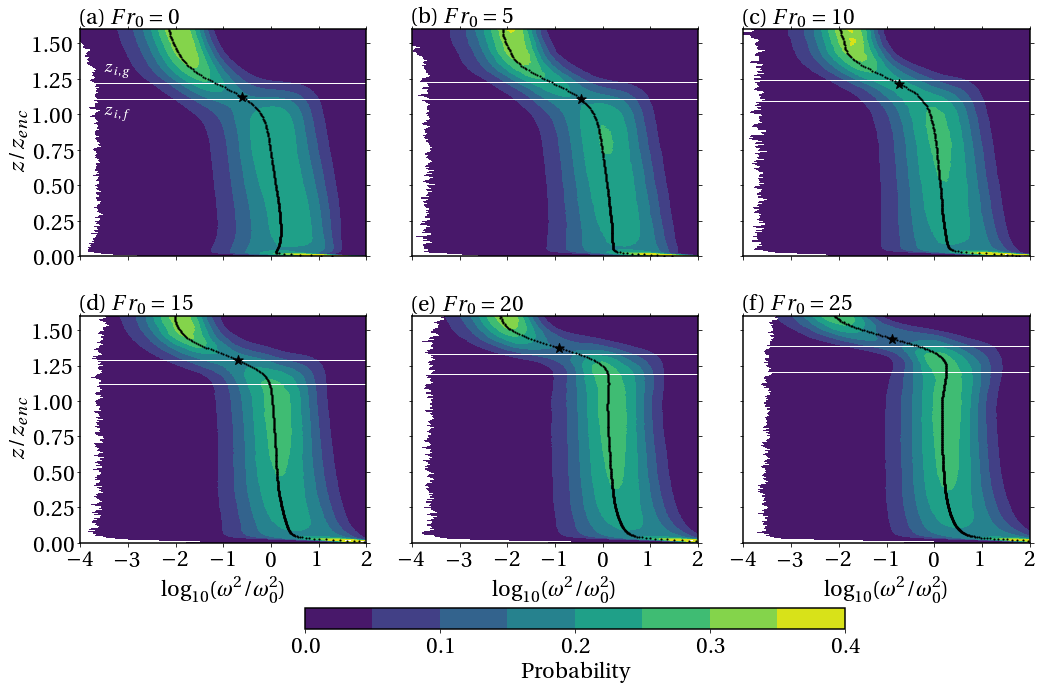

In [19]:
# Plot

f, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,sharex='all',sharey='all',figsize=(15,10))
ax1.tick_params(bottom=True,top=True,left=True,right=True)
ax2.tick_params(bottom=True,top=True,left=True,right=True)
ax3.tick_params(bottom=True,top=True,left=True,right=True)
ax4.tick_params(bottom=True,top=True,left=True,right=True)
ax5.tick_params(bottom=True,top=True,left=True,right=True)
ax6.tick_params(bottom=True,top=True,left=True,right=True)
ax1.set_xlim(-4,2) 
ax1.set_ylim(0,1.6)
ax1.set_xticks([-4,-3,-2,-1,0,1,2])
ax1.set_yticks([0,0.25,0.5,0.75,1,1.25,1.5])

cs1 = ax1.contourf(S0_vortpdf_x_mean,S0_vortpdf_y_mean,S0_vortpdf_interp_runmean,cmap='viridis',levels=np.linspace(0,0.4,9))
ax1.axhline(np.mean(S0.z_ig/S0.z_enc),0,1,color='w',linewidth=1,zorder=1)
ax1.axhline(np.mean(S0.z_if/S0.z_enc),0,1,color='w',linewidth=1,zorder=1)
ax1.scatter(meanvort_S0,S0.y/np.mean(S0.z_enc),5,color='k',marker='.',zorder=2)
ax1.scatter(meanvort_saddle_S0,y_vort_saddle_S0,100,color='k',marker='*',zorder=2)

cs2 = ax2.contourf(S05_vortpdf_x_mean,S05_vortpdf_y_mean,S05_vortpdf_interp_runmean,cmap='viridis',levels=np.linspace(0,0.4,9))
ax2.axhline(np.mean(S05.z_ig/S05.z_enc),0,1,color='w',linewidth=1,zorder=1)
ax2.axhline(np.mean(S05.z_if/S05.z_enc),0,1,color='w',linewidth=1,zorder=1)
ax2.scatter(meanvort_S05,S05.y/np.mean(S05.z_enc),5,color='k',marker='.',zorder=2)
ax2.scatter(meanvort_saddle_S05,y_vort_saddle_S05,100,color='k',marker='*',zorder=2)

cs3 = ax3.contourf(S10_vortpdf_x_mean,S10_vortpdf_y_mean,S10_vortpdf_interp_runmean,cmap='viridis',levels=np.linspace(0,0.4,9))
ax3.axhline(np.mean(S10.z_ig/S10.z_enc),0,1,color='w',linewidth=1,zorder=1)
ax3.axhline(np.mean(S10.z_if/S10.z_enc),0,1,color='w',linewidth=1,zorder=1)
ax3.scatter(meanvort_S10,S10.y/np.mean(S10.z_enc),5,color='k',marker='.',zorder=2)
ax3.scatter(meanvort_saddle_S10,y_vort_saddle_S10,100,color='k',marker='*',zorder=2)

cs4 = ax4.contourf(S15_vortpdf_x_mean,S15_vortpdf_y_mean,S15_vortpdf_interp_runmean,cmap='viridis',levels=np.linspace(0,0.4,9))
ax4.axhline(np.mean(S15.z_ig/S15.z_enc),0,1,color='w',linewidth=1,zorder=1)
ax4.axhline(np.mean(S15.z_if/S15.z_enc),0,1,color='w',linewidth=1,zorder=1)
ax4.scatter(meanvort_S15,S15.y/np.mean(S15.z_enc),5,color='k',marker='.',zorder=2)
ax4.scatter(meanvort_saddle_S15,y_vort_saddle_S15,100,color='k',marker='*',zorder=2)

cs5 = ax5.contourf(S20_vortpdf_x_mean,S20_vortpdf_y_mean,S20_vortpdf_interp_runmean,cmap='viridis',levels=np.linspace(0,0.4,9))
ax5.axhline(np.mean(S20.z_ig/S20.z_enc),0,1,color='w',linewidth=1,zorder=1)
ax5.axhline(np.mean(S20.z_if/S20.z_enc),0,1,color='w',linewidth=1,zorder=1)
ax5.scatter(meanvort_S20,S20.y/np.mean(S20.z_enc),5,color='k',marker='.',zorder=2)
ax5.scatter(meanvort_saddle_S20,y_vort_saddle_S20,100,color='k',marker='*',zorder=2)

cs6 = ax6.contourf(S25_vortpdf_x_mean,S25_vortpdf_y_mean,S25_vortpdf_interp_runmean,cmap='viridis',levels=np.linspace(0,0.4,9))
ax6.axhline(np.mean(S25.z_ig/S25.z_enc),0,1,color='w',linewidth=1,zorder=1)
ax6.axhline(np.mean(S25.z_if/S25.z_enc),0,1,color='w',linewidth=1,zorder=1)
ax6.scatter(meanvort_S25,S25.y/np.mean(S25.z_enc),5,color='k',marker='.',zorder=2)
ax6.scatter(meanvort_saddle_S25,y_vort_saddle_S25,100,color='k',marker='*',zorder=2)


ax1.text(-3.5,1,r'$z_{i,f}$',color='w',fontsize=18)
ax1.text(-3.5,1.3,r'$z_{i,g}$',color='w',fontsize=18)
ax1.set_ylabel(r'$z/z_{enc}$')
ax4.set_ylabel(r'$z/z_{enc}$')
ax4.set_xlabel(r'$\log_{10}(\omega^2/\omega_0^2)$')
ax5.set_xlabel(r'$\log_{10}(\omega^2/\omega_0^2)$')
ax6.set_xlabel(r'$\log_{10}(\omega^2/\omega_0^2)$')
ax1.set_title(r'(a) $Fr_0=0$',fontsize=24,loc='left')
ax2.set_title(r'(b) $Fr_0=5$',fontsize=24,loc='left')
ax3.set_title(r'(c) $Fr_0=10$',fontsize=24,loc='left')
ax4.set_title(r'(d) $Fr_0=15$',fontsize=24,loc='left')
ax5.set_title(r'(e) $Fr_0=20$',fontsize=24,loc='left')
ax6.set_title(r'(f) $Fr_0=25$',fontsize=24,loc='left')
cbar_ax = f.add_axes([0.3,0.1,0.5,0.03])
cbar = f.colorbar(cs1,cax=cbar_ax,ticks=[0,0.1,0.2,0.3,0.4],orientation='horizontal')
cbar.set_label('Probability')
plt.tight_layout(rect=[0,0.1,1,1],h_pad=1)
plt.savefig(opath+'pdfs_mean.pdf',bbox_inches='tight')
plt.show()
